## QUIZ 1-1

### 2 

Consider the following scenario. 

Green Energy Solutions is a company specializing in solar panel installations. They have a limited workforce and want to maximize their profit while adhering to certain constraints. The company has two types of solar panel installations: Type A and Type B.

Each Type A installation:

- Requires 12 hours of labor

- Costs $500 in materials

- Generates $800 profit per installation. 

Each Type B installation:

- Requires 8 hours of labor

- Costs $300 in materials

- Generates $600 profit per installation.  

The company has a total of 

- 1000 labor hours available.

- The company has $400,000 in cash at hand.

Due to supply constraints, the company can only install a maximum of 300 Type A panels. 

Formulate a linear program to maximize the profits while adhering to the constraints above. Let decision variable A denote the number of type A installation and decision variable B denote the number of type B installations.

Choose the correct answers from the choices given below.

In [ ]:
from pulp import *

model = LpProblem("GreenEnergy", LpMaximize)
x = LpVariable("A", 0, 300)
y = LpVariable("B", 0)

# objective function
model += 800*x + 600*y

# constraints
model += 12*x + 8*y <= 1000
model += 500*x + 300*y <= 400_000

In [2]:
from pulp import *
mdl = LpProblem('my_problem', LpMaximize)
x = LpVariable('x', lowBound = 0)
y = LpVariable('y', lowBound = 0, upBound = 4)
mdl += (x + 2 * y)
mdl += x <= y + 3
mdl += x >= y - 1
mdl += x - 2 * y <= 5
status= mdl.solve()
print(status)
print(x.value())
print(y.value())
print(mdl.objective.value())

1
7.0
4.0
15.0


In [1]:
from pulp import *
mdl = LpProblem('my_problem', LpMaximize)
x = LpVariable('x', lowBound = 0)
y = LpVariable('y', lowBound = 0, upBound = 4)
mdl += (x + 2 * y)
mdl += x <= y + 3
mdl += x >= y - 1
mdl += x - 2 * y <= 5

print(y.value())

status= mdl.solve()
assert status == LpStatusOptimal
print(status)
print(x.value())
print(y.value())
print(mdl.objective.value())

None
1
7.0
4.0
15.0


In [1]:
from pulp import *
mdl = LpProblem('n_problem', LpMaximize)
n = 15
vars = [ LpVariable(f'x{i}', lowBound = 0.0) for i in range(n)]
mdl += lpSum(vars)
for i in range(14):
    mdl += vars[i] - vars[i+1] <= i
    mdl += vars[i] - vars[i+1] >= -i

mdl

n_problem:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x2 + 1*x3 + 1*x4 + 1*x5 + 1*x6 + 1*x7 + 1*x8 + 1*x9 + 0
SUBJECT TO
_C1: x0 - x1 <= 0

_C2: x0 - x1 >= 0

_C3: x1 - x2 <= 1

_C4: x1 - x2 >= -1

_C5: x2 - x3 <= 2

_C6: x2 - x3 >= -2

_C7: x3 - x4 <= 3

_C8: x3 - x4 >= -3

_C9: x4 - x5 <= 4

_C10: x4 - x5 >= -4

_C11: x5 - x6 <= 5

_C12: x5 - x6 >= -5

_C13: x6 - x7 <= 6

_C14: x6 - x7 >= -6

_C15: x7 - x8 <= 7

_C16: x7 - x8 >= -7

_C17: x8 - x9 <= 8

_C18: x8 - x9 >= -8

_C19: - x10 + x9 <= 9

_C20: - x10 + x9 >= -9

_C21: x10 - x11 <= 10

_C22: x10 - x11 >= -10

_C23: x11 - x12 <= 11

_C24: x11 - x12 >= -11

_C25: x12 - x13 <= 12

_C26: x12 - x13 >= -12

_C27: x13 - x14 <= 13

_C28: x13 - x14 >= -13

VARIABLES
x0 Continuous
x1 Continuous
x10 Continuous
x11 Continuous
x12 Continuous
x13 Continuous
x14 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous
x7 Continuous
x8 Continuous
x9 Continuous

In [ ]:
status = mdl.solve()
if status == LpStatusOptimal:
    print('Optimal solution found!')
    print([vi.value() for vi in vars])
    print(mdl.objective.value())
elif status == LpStatusInfeasible:
    print('Infeasible problem')
elif status == LpStatusUnbounded:
    print('Unbounded problem')
else:
    print('Unknown status')

## QUIZ 1-2

### 2-Consider the following code snippet:

In [9]:
from pulp import *
mdl = LpProblem('my_problem', LpMaximize)
x = LpVariable('x', lowBound = 0)
y = LpVariable('y', lowBound = 0, upBound = 4)
mdl += (x + 2 * y)
mdl += x <= y + 3
mdl += x >= y - 1
mdl += x - 2 * y <= 5
status= mdl.solve()
print(x.value())
print(y.value())
print(mdl.objective.value())

7.0
4.0
15.0


Visualize the Feasible Region of Linear Problem

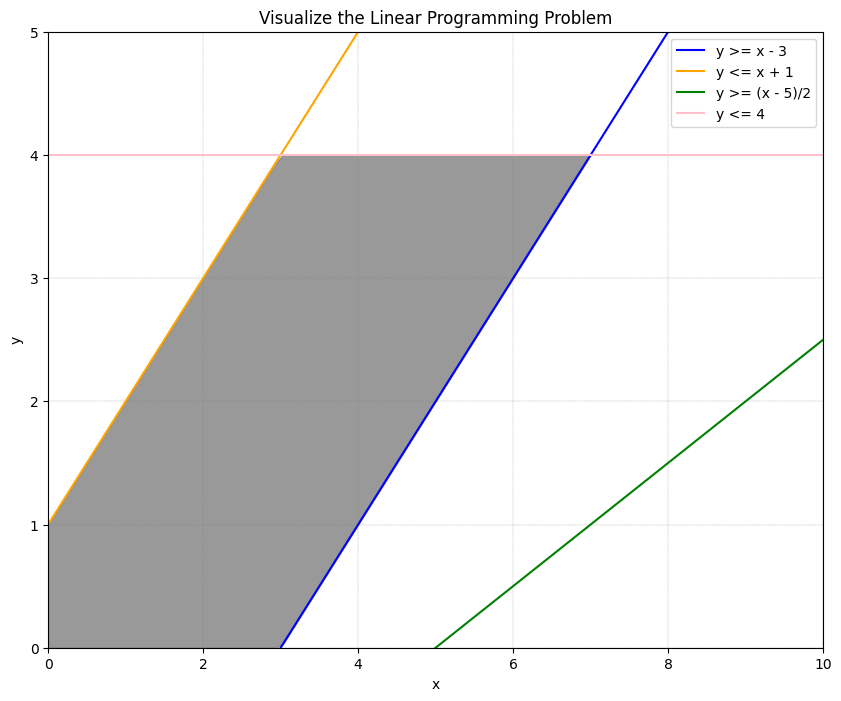

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraints
def constraint1(x):
    return (x - 3)  # from x <= y + 3  => y >= x - 3

def constraint2(x):
    return (x + 1)  # from x >= y - 1  => y <= x + 1

def constraint3(x):
    return (0.5 * x - 2.5)  # from x - 2 * y <= 5 => y >= (x - 5)/2

# Define x values
x = np.linspace(0, 10, 100)

# up boundary of y is 4, y<=4,
# default low boundary of y is 0, there is no definition of low boundary.
y = np.linspace(4, 4, 100)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the constraints
plt.plot(x, constraint1(x), label='y >= x - 3', color='blue')
plt.plot(x, constraint2(x), label='y <= x + 1', color='orange')
plt.plot(x, constraint3(x), label='y >= (x - 5)/2', color='green')
plt.plot(x, y, label='y <= 4', color='pink')

# Fill feasible region

# find the low boundary from the maximum of y>=0, y>=x-3 and y>=(x-5)/2
y_min = np.maximum( np.maximum(0, constraint1(x)), constraint3(x))

# find the up boundary from the minimum of y<=4 and y<=x+1
y_max = np.minimum(constraint2(x), 4)

plt.fill_between(x, y_max, y_min, where=(y_min<=y_max), interpolate=True, color='gray', alpha=0.8)

# Set limits and labels
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region of the Linear Programming Problem')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()

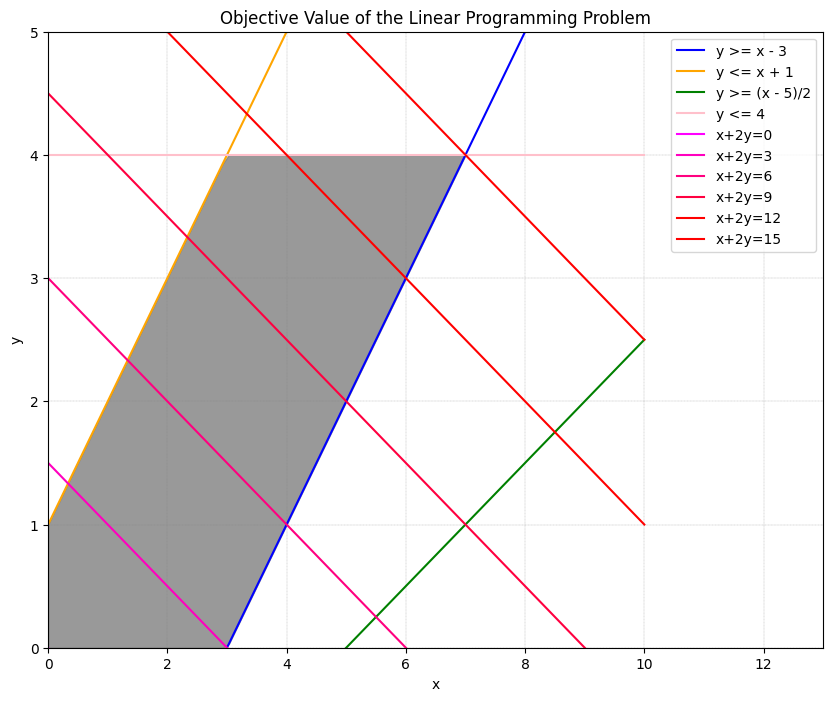

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the constraints
def constraint1(x):
    return (x - 3)  # from x <= y + 3  => y >= x - 3

def constraint2(x):
    return (x + 1)  # from x >= y - 1  => y <= x + 1

def constraint3(x):
    return (0.5 * x - 2.5)  # from x - 2 * y <= 5 => y >= (x - 5)/2

# Define x values
x = np.linspace(0, 10, 100)

# up boundary of y is 4, y<=4,
# default low boundary of y is 0, there is no definition of low boundary.
y = np.linspace(4, 4, 100)

# Create the plot
plt.figure(figsize=(10, 8))

# Plot the constraints
plt.plot(x, constraint1(x), label='y >= x - 3', color='blue')
plt.plot(x, constraint2(x), label='y <= x + 1', color='orange')
plt.plot(x, constraint3(x), label='y >= (x - 5)/2', color='green')
plt.plot(x, y, label='y <= 4', color='pink')

# Fill feasible region

# find the low boundary from the maximum of y>=0, y>=x-3 and y>=(x-5)/2
y_min = np.maximum( np.maximum(0, constraint1(x)), constraint3(x))

# find the up boundary from the minimum of y<=4 and y<=x+1
y_max = np.minimum(constraint2(x), 4)
plt.fill_between(x, y_max, y_min, where=(y_min<=y_max), interpolate=True, color='gray', alpha=0.8)

# plot the objective max(x + 2 * y)=objective_value, y=(objective_value - x)/2
colors = [(1, 0, 1), (1, 0, 0)]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=5)
for i in range(0, 16, 3):
    object_y = (i - x)/2
    color = cmap(i/12)
    plt.plot(x, object_y, label=f'x+2y={i}', color=color)

# Set limits and labels
plt.xlim(0, 13)
plt.ylim(0, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Objective Value of the Linear Programming Problem')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.legend()
plt.show()

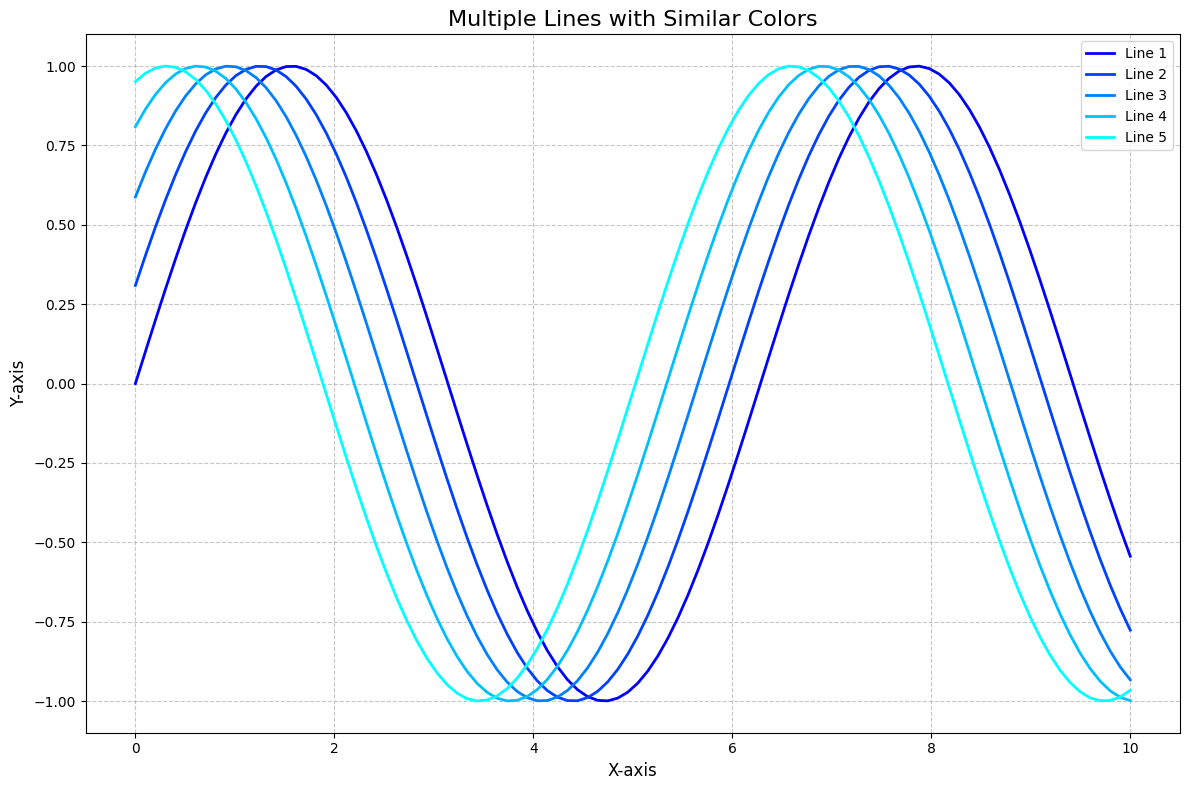

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Create data
x = np.linspace(0, 10, 100)
num_lines = 5

# Create a custom color map (you can adjust these colors as needed)
colors = [(0, 0, 1), (0, 1, 1)]  # Blue to Cyan
n_bins = num_lines  # Number of colors to generate
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot multiple lines with similar but different colors
for i in range(num_lines):
    y = np.sin(x + i*np.pi/10)  # Slightly phase-shifted sine waves
    color = cmap(i / (num_lines - 1))  # Get color from colormap
    plt.plot(x, y, color=color, label=f'Line {i+1}', linewidth=2)

# Customize the plot
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.title('Multiple Lines with Similar Colors', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

### Question 3

Consider again the code snippet  from the previous problem

In [1]:
from pulp import *
mdl = LpProblem('my_problem', LpMaximize)
x = LpVariable('x', lowBound = 0)
y = LpVariable('y', lowBound = 0, upBound = 4)
mdl += (x + 2 * y)
mdl += x <= y + 3
mdl += x >= y - 1
mdl += x - 2 * y <= 5
status= mdl.solve()
assert status == LpStatusOptimal
print(x.value())
print(y.value())
print(mdl.objective.value())

7.0
4.0
15.0


### Question 4

In [5]:
from pulp import *
mdl = LpProblem('n_problem', LpMaximize)
n = 15
vars = [ LpVariable(f'x{i}', lowBound = 0.0) for i in range(n)]
mdl += lpSum(vars)
for i in range(14):
    mdl += vars[i] - vars[i+1] <= i
    mdl += vars[i] - vars[i+1] >= -i
mdl.constraints

OrderedDict([('_C1', 1*x0 + -1*x1 + 0 <= 0),
             ('_C2', 1*x0 + -1*x1 + 0 >= 0),
             ('_C3', 1*x1 + -1*x2 + -1 <= 0),
             ('_C4', 1*x1 + -1*x2 + 1 >= 0),
             ('_C5', 1*x2 + -1*x3 + -2 <= 0),
             ('_C6', 1*x2 + -1*x3 + 2 >= 0),
             ('_C7', 1*x3 + -1*x4 + -3 <= 0),
             ('_C8', 1*x3 + -1*x4 + 3 >= 0),
             ('_C9', 1*x4 + -1*x5 + -4 <= 0),
             ('_C10', 1*x4 + -1*x5 + 4 >= 0),
             ('_C11', 1*x5 + -1*x6 + -5 <= 0),
             ('_C12', 1*x5 + -1*x6 + 5 >= 0),
             ('_C13', 1*x6 + -1*x7 + -6 <= 0),
             ('_C14', 1*x6 + -1*x7 + 6 >= 0),
             ('_C15', 1*x7 + -1*x8 + -7 <= 0),
             ('_C16', 1*x7 + -1*x8 + 7 >= 0),
             ('_C17', 1*x8 + -1*x9 + -8 <= 0),
             ('_C18', 1*x8 + -1*x9 + 8 >= 0),
             ('_C19', -1*x10 + 1*x9 + -9 <= 0),
             ('_C20', -1*x10 + 1*x9 + 9 >= 0),
             ('_C21', 1*x10 + -1*x11 + -10 <= 0),
             ('_C22', 1*x10 

In [3]:
status = mdl.solve()
if status == LpStatusOptimal:
    print('Optimal solution found!')
    print([vi.value() for vi in vars])
    print(mdl.objective.value())
elif status == LpStatusInfeasible:
    print('Infeasible problem')
elif status == LpStatusUnbounded:
    print('Unbounded problem')
else:
    print('Unknown status')

Unbounded problem


## QUIZ 1-3

### QUESTION 1

Select all the options that are true for network flow problems. Assume all edge capacities are finite and non-negative.

- [x] At each vertex , the incoming flow equals the outgoing flow. 
- [x] Network flow problems are always feasible as long as the graph is connected.
- [x] Flow capacity can be less than or equal to the capacity of the edge.
- [ ] Network flow problems may be unbounded.
- [ ] There should not exist any cycles in the network.
